In [19]:
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt

agent = 'A-1'

with open(f'./agents/{agent}/epochs.json') as file:
  epochs = json.load(file)
with open(f'./agents/{agent}/evaluations.json') as file:
  evaluations = json.load(file)

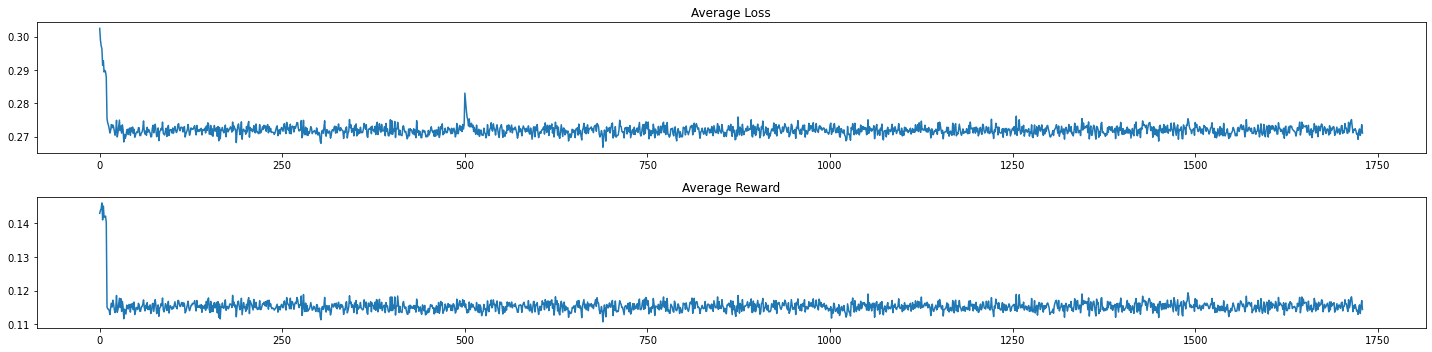

In [20]:
x = [i['epoch'] for i in epochs][:]
y_loss = [i['loss']**0.5 for i in epochs if i['epoch'] in x]
y_rewards = [i['reward'] for i in epochs if i['epoch'] in x]

figure, axis = plt.subplots(2,1)
figure.set_figheight(5)
figure.set_figwidth(20)

axis[0].set_title("Average Loss")
axis[0].plot(x,y_loss)

axis[1].set_title("Average Reward")
axis[1].plot(x,y_rewards)

figure.tight_layout()


KeyError: 'max_reward'